In [1]:
import sqlalchemy
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Movies table

In [2]:
engine = sqlalchemy.create_engine('sqlite:///{}'.format(os.path.join(os.getcwd(), 'imdb_test.db')))
movies = pd.read_sql("""select * from movies""", con=engine)

In [3]:
movies.shape

(3650, 26)

In [4]:
movies.head()

,id,imdbVotes,Metascore,imdbID,Title,Writer,Website,Runtime,Director,DVD,...,Plot,Rated,imdbRating,Actors,Response,Year,Genre,Released,Awards,Type
0,None,"37,811",38,tt0424823,Balls of Fury,"Thomas Lennon, Robert Ben Garant",http://www.ballsoffury.com/,90 min,Robert Ben Garant,18 Dec 2007,...,Down-and-out former professional ping-pong phe...,PG-13,5.3,"Dan Fogler, Christopher Walken, George Lopez, ...",True,2007,"Comedy, Crime, Sport",29 Aug 2007,N/A,movie
1,None,"555,443",76,tt1951264,The Hunger Games: Catching Fire,"Simon Beaufoy (screenplay), Michael Arndt (scr...",http://www.thehungergamesexplorer.com/us/,146 min,Francis Lawrence,07 Mar 2014,...,Katniss Everdeen and Peeta Mellark become targ...,PG-13,7.5,"Jennifer Lawrence, Liam Hemsworth, Jack Quaid,...",True,2013,"Action, Adventure, Mystery",22 Nov 2013,Nominated for 1 Golden Globe. Another 22 wins ...,movie
2,None,"217,190",52,tt0221027,Blow,"Bruce Porter (book), David McKenna (screenplay...",http://www.getsomeblow.com,124 min,Ted Demme,11 Sep 2001,...,"The story of how George Jung, along with the M...",R,7.6,"Johnny Depp, Penélope Cruz, Franka Potente, Ra...",True,2001,"Biography, Crime, Drama",06 Apr 2001,3 wins & 9 nominations.,movie
3,None,"544,373",54,tt0121765,Star Wars: Episode II - Attack of the Clones,"George Lucas (screenplay by), Jonathan Hales (...",http://www.starwars.com/episode-ii/,142 min,George Lucas,12 Nov 2002,...,"Ten years after initially meeting, Anakin Skyw...",PG,6.6,"Ewan McGregor, Natalie Portman, Hayden Christe...",True,2002,"Action, Adventure, Fantasy",16 May 2002,Nominated for 1 Oscar. Another 16 wins & 58 no...,movie
4,None,"86,798",52,tt0230011,Atlantis: The Lost Empire,"Tab Murphy (screenplay by), Kirk Wise (story b...",http://disney.go.com/disneypictures/atlantis/i...,95 min,"Gary Trousdale, Kirk Wise",29 Jan 2002,...,A young adventurer named Milo Thatch joins an ...,PG,6.8,"Corey Burton, Claudia Christian, Michael J. Fo...",True,2001,"Animation, Action, Adventure",15 Jun 2001,2 wins & 14 nominations.,movie


In [5]:
movies.columns

Index(['id', 'imdbVotes', 'Metascore', 'imdbID', 'Title', 'Writer', 'Website',
       'Runtime', 'Director', 'DVD', 'BoxOffice', 'Production', 'Poster',
       'totalSeasons', 'Language', 'Country', 'Plot', 'Rated', 'imdbRating',
       'Actors', 'Response', 'Year', 'Genre', 'Released', 'Awards', 'Type'],
      dtype='object')

# extract year from 'Released' and 'year'

In [14]:
set(movies['Year'].str.extract('(\D+)'))

/home/ariel/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


{nan, '–'}

In [32]:

mean_years_from_range = lambda years: np.mean([int(year) for year in years.split(r'–')])
movies['Year'] = movies['Year'].apply(mean_years_from_range)     

In [33]:
movies['Released_year'] = movies['Released'].str.extract(r'\w (\d+)').astype(float)
movies.query('Released_year != Year')[['Released', 'Released_year', 'Year']].head()

/home/ariel/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,Released,Released_year,Year
10,14 Aug 2009,2009.0,2008.0
16,06 Jan 2017,2017.0,2016.0
20,20 Aug 2004,2004.0,2003.0
24,01 Jan 1974,1974.0,1973.0
26,31 May 2012,2012.0,2011.0


In [34]:
np.abs(movies['Released_year'] - movies['Year']).value_counts()

0.0     3095
1.0      495
2.0       37
4.0        9
3.0        4
2.5        1
5.0        1
6.0        1
19.0       1
dtype: int64

The difference is not so big so I'll stick to the 'Year' column

In [35]:
movies.drop('Released_year', axis=1, inplace=True)

# 'Runtime' column

In [36]:
set(movies.Runtime.str.extract('(\D+)').values)

/home/ariel/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


{' min', 'N/A'}

# 'Rated' column

In [37]:
movies.Rated.value_counts()

R            1505
PG-13        1072
PG            601
NOT RATED     235
G             127
N/A            51
TV-MA          16
PASSED          7
NC-17           7
UNRATED         6
TV-14           6
GP              6
APPROVED        5
TV-G            2
TV-PG           2
M               1
M/PG            1
Name: Rated, dtype: int64

# 'Type' columns

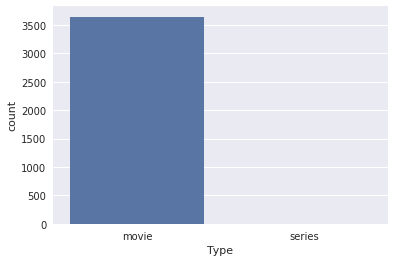

In [38]:
sns.countplot(movies.Type);

# 'Metascore' column ?

In [39]:
movies.Metascore.head(10)

0    38
1    76
2    52
3    54
4    52
5    75
6    79
7    67
8    65
9    48
Name: Metascore, dtype: object

# 'Awards' column

In [40]:
total_awards = ' '.join(movies.Awards.values)
total_awards = re.sub('[\.,\d]', '', total_awards)
total_awards

'N/A Nominated for  Golden Globe Another  wins &  nominations  wins &  nominations Nominated for  Oscar Another  wins &  nominations  wins &  nominations Nominated for  Oscars Another  wins &  nominations Nominated for  Golden Globe Another  wins &  nominations  wins &  nominations  wins &  nominations Nominated for  Golden Globe Another  wins &  nominations  wins &  nominations  win &  nomination Won  Oscar Another  wins &  nominations  wins &  nominations Nominated for  Oscar Another  wins &  nominations Won  Oscar Another  wins &  nominations  wins &  nominations Nominated for  Oscar Another  wins &  nominations Nominated for  BAFTA Film Award Another  wins &  nominations  nomination  win &  nominations Won  Oscars Another  wins &  nominations Nominated for  Golden Globes Another  wins &  nominations Nominated for  Golden Globe Another  nominations Won  BAFTA Film Award Another  nominations  win &  nominations  nominations  wins &  nominations Won  Oscar Another  wins &  nominations

In [41]:
from collections import Counter
Counter(total_awards.split())

Counter({'&': 2644,
         'Another': 1336,
         'Award': 69,
         'Awards': 15,
         'BAFTA': 84,
         'Emmy': 1,
         'Film': 84,
         'Globe': 165,
         'Globes': 47,
         'Golden': 212,
         'N/A': 319,
         'Nominated': 881,
         'Oscar': 555,
         'Oscars': 484,
         'Primetime': 1,
         'Won': 455,
         'for': 881,
         'nomination': 332,
         'nominations': 2876,
         'win': 530,
         'wins': 2237})

In [42]:
splited_awards = [] 
for award in movies.Awards.values:
#     award = re.sub('\.\s?\b', '', award)
#     print(award)
    for w in award.split('&'):
        for i in w.split('.'):
            splited_awards.append(i)
#     print()
set(splited_awards)

{'',
 ' 1 nomination',
 ' 10 nominations',
 ' 100 nominations',
 ' 101 nominations',
 ' 102 nominations',
 ' 103 nominations',
 ' 105 nominations',
 ' 106 nominations',
 ' 107 nominations',
 ' 109 nominations',
 ' 11 nominations',
 ' 110 nominations',
 ' 111 nominations',
 ' 112 nominations',
 ' 113 nominations',
 ' 116 nominations',
 ' 118 nominations',
 ' 119 nominations',
 ' 12 nominations',
 ' 120 nominations',
 ' 121 nominations',
 ' 122 nominations',
 ' 123 nominations',
 ' 124 nominations',
 ' 125 nominations',
 ' 126 nominations',
 ' 128 nominations',
 ' 129 nominations',
 ' 13 nominations',
 ' 130 nominations',
 ' 131 nominations',
 ' 132 nominations',
 ' 133 nominations',
 ' 134 nominations',
 ' 135 nominations',
 ' 136 nominations',
 ' 137 nominations',
 ' 138 nominations',
 ' 14 nominations',
 ' 141 nominations',
 ' 142 nominations',
 ' 143 nominations',
 ' 144 nominations',
 ' 145 nominations',
 ' 146 nominations',
 ' 15 nominations',
 ' 150 nominations',
 ' 151 nomination

In [44]:
def extract_win_and_nominate(awards_string):
    win_number, nominate_number = 0, 0
    for i in re.split('&|,|\.', str(awards_string)):
        if 'nominat' in i.lower():
            nominate_number += int(re.search('\d+', i).group(0))
        elif ('win' in i.lower()) or ('won' in i.lower()):
            win_number += int(re.search('\d+', i).group(0))

    return win_number, nominate_number

In [45]:
win_number, nominate_number = zip(*movies['Awards'].apply(extract_win_and_nominate))
list(zip(win_number, nominate_number, movies['Awards']))

[(0, 0, 'N/A'),
 (22, 67, 'Nominated for 1 Golden Globe. Another 22 wins & 66 nominations.'),
 (3, 9, '3 wins & 9 nominations.'),
 (16, 59, 'Nominated for 1 Oscar. Another 16 wins & 58 nominations.'),
 (2, 14, '2 wins & 14 nominations.'),
 (13, 43, 'Nominated for 2 Oscars. Another 13 wins & 41 nominations.'),
 (9, 18, 'Nominated for 1 Golden Globe. Another 9 wins & 17 nominations.'),
 (2, 6, '2 wins & 6 nominations.'),
 (5, 12, '5 wins & 12 nominations.'),
 (7, 20, 'Nominated for 1 Golden Globe. Another 7 wins & 19 nominations.'),
 (11, 19, '11 wins & 19 nominations.'),
 (1, 1, '1 win & 1 nomination.'),
 (31, 99, 'Won 1 Oscar. Another 30 wins & 99 nominations.'),
 (2, 3, '2 wins & 3 nominations.'),
 (20, 29, 'Nominated for 1 Oscar. Another 20 wins & 28 nominations.'),
 (7, 15, 'Won 1 Oscar. Another 6 wins & 15 nominations.'),
 (38, 51, '38 wins & 51 nominations.'),
 (2, 8, 'Nominated for 1 Oscar. Another 2 wins & 7 nominations.'),
 (17,
  22,
  'Nominated for 1 BAFTA Film Award. Anothe

# extract from comma sperated strings

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(tokenizer=lambda t: re.split(' , |, |,| ,', t))

In [47]:
movies.loc[:2, 'Language']

0    English, Mandarin
1              English
2              English
Name: Language, dtype: object

In [48]:
pd.DataFrame(vec.fit_transform(movies.loc[:2, 'Language']).toarray(), columns=vec.get_feature_names())

,english,mandarin
0,1,1
1,1,0
2,1,0


# 'BoxOffice'

In [72]:
set(movies['BoxOffice'].str.replace('\D', ''))

{'',
 '19037418',
 '100446895',
 '11674449',
 '79711678',
 '560778',
 '61100000',
 '29227473',
 '66412009',
 '67905760',
 '6390014',
 '2021399',
 '15412701',
 '55179308',
 '400736600',
 '171031347',
 '16967576',
 '24600000',
 '23225911',
 '4244155',
 '293792936',
 '130127620',
 '17255675',
 '84045006',
 '4551688',
 '4624014',
 '85095337',
 '30500882',
 '129402415',
 '24799765',
 '18600000',
 '14008193',
 '146872826',
 '30825490',
 '22092592',
 '1189207',
 '115802596',
 '5802820',
 '66305045',
 '14945592',
 '161317423',
 '316986481',
 '53100000',
 '72609225',
 '6543347',
 '114138208',
 '18236897',
 '72655779',
 '2141423',
 '33454313',
 '16755117',
 '20300218',
 '124420707',
 '334166825',
 '58260046',
 '8114507',
 '117623',
 '107453620',
 '21600000',
 '260300000',
 '26300000',
 '24673716',
 '260713',
 '29458928',
 '2317507',
 '59445889',
 '118153533',
 '132500000',
 '82820167',
 '54400000',
 '403706375',
 '36300285',
 '80200000',
 '46214579',
 '59856288',
 '370904',
 '37481242',
 '254505

# clean

In [76]:
def clean_movies(movies_df):
    movies_df = movies_df.copy()
    # drop unrelevant columns
    movies_df.drop(['id', 'DVD', 'Website', 'Response', 'Poster', 'Released'], axis=1, inplace=True)
    # conver to nan
    movies_df.replace('N/A', np.nan, inplace=True)
    
    movies_df['imdbVotes'] = movies_df['imdbVotes'].str.replace(',', '').astype(float)
    
    BoxOffice_pound_index = movies_df.dropna()[~movies_df['BoxOffice'].dropna().str.contains('\$')].index
    movies_df['BoxOffice'] = movies_df.BoxOffice.str.replace('\D', '').astype(float)
    movies_df.loc[BoxOffice_pound_index, 'BoxOffice'] *= 1.3
    
    mean_years_from_range = lambda years: np.mean([int(year) for year in years.split(r'–')])
    movies['Year'].apply(mean_years_from_range)
    
    
    movies_df['Runtime'] = movies.Runtime.str.extract('(\d+)').astype(float)
    return movies_df

In [50]:
movies[~movies['BoxOffice'].str.contains('\$')].index

Int64Index([   2,    6,    8,   11,   12,   13,   15,   17,   18,   20,
            ...
            3631, 3632, 3633, 3636, 3639, 3640, 3642, 3643, 3646, 3647],
           dtype='int64', length=1870)

In [74]:
clean = clean_movies(movies)

/home/ariel/venv/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


TypeError: repl must be a string or callable

In [ ]:
clean.info()

In [ ]:
clean.head()

In [ ]:
def extract_from_comma_sperated_strings(full_df, column_name):
    vec = CountVectorizer(tokenizer=lambda t: re.split(' , |, |,| ,', t))
    
    df_array = vec.fit_transform(full_df[column_name].fillna('Not_provided')).toarray()
    fields = ['{}_{}'.format(column_name, col) for col in vec.get_feature_names()]

    return pd.DataFrame(df_array, columns=fields)

In [ ]:
def extract(movies):
    movies_df = movies.copy()
    
    movies_df['Awards_wins'], movies_df['Awards_nominate'] = zip(*movies_df['Awards'].apply(extract_win_and_nominate))
    movies_df.drop('Awards', axis=1, inplace=True)
    
    for column_name in ['Country', 'Director', 'Genre', 'Language', 'Actors', 'Production', 'Writer']:
        if column_name ==  'Director': # There are some co-directors which is noted with perentesis
            movies_df['Director'] = movies_df['Director'].str.replace('\(.+\)', '')
        movies_df = movies_df.join(extract_from_comma_sperated_strings(movies_df, column_name))
        movies_df.drop(column_name, axis=1, inplace=True)
        
    
    
    return movies_df

In [ ]:
extract(clean).select_dtypes(include='object')

In [ ]:

# movies.to_sql(name='movies_clean', con=engine)